## Linear regression

First, lets import the library folder of the virtual environment. This allow us to work inside this notebook.

In [1]:
import sys
import os
sys.path.append(os.getcwd()+'/venv/lib/python3.6/site-packages/')

#### Loading data

In [2]:
import pandas as pd

datafile = {'pasivos': 'data/pasivos.csv','detractores': 'data/detractores.csv'}

df_list = []
for data, file in datafile.items():
    df = pd.read_csv(file)
    df['class'] = data
    df_list.append(df.fillna(0))


#### Output categories

In [3]:
categories = ['servicio ripley','mayor saldo','falta informacion',
           'aumentar cant trans','performance','formas de carga',
           'usabilidad','puntos ripley','cumplir promociones',
           'mejorar beneficios','premiar app','nuevo',
           'atencion al cliente','seguridad','transacciones diarias',
           'datos usuario','huawei']

for data in df_list:
    for cat in categories:
        data[cat] = pd.to_numeric(data[cat])

#### Plotting data for each category

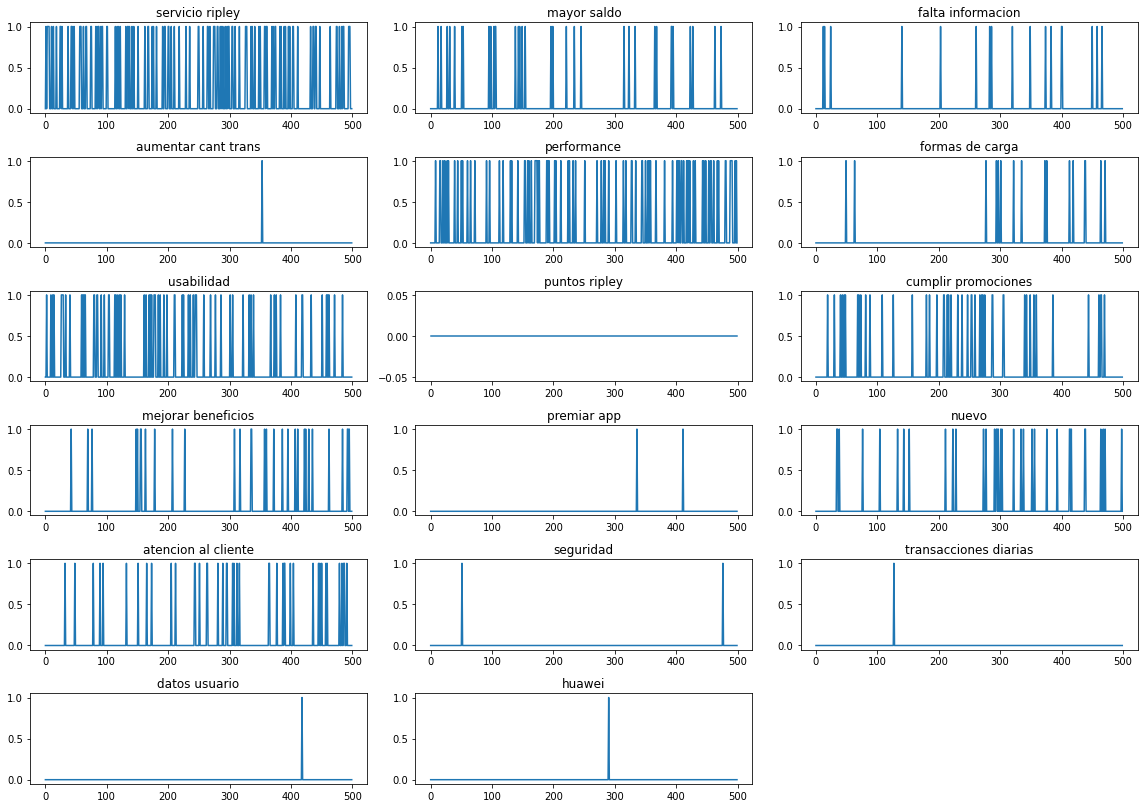

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(int(np.ceil(len(categories)/3)),3,figsize=(16,2*len(categories)/3))

for i,cat in enumerate(categories):
    if (data[cat] == None).any():
        print('fuck')
    axs[int(i/3)][i%3].plot(range(len(data[cat])),data[cat])
    axs[int(i/3)][i%3].set_title(cat)
    
fig.delaxes(axs[-1][-1])
plt.tight_layout()

#### Performing logistic regression over each data
Separates data in train and test.
During the process, the texts are vectorized using a bag of words approach.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

vectorizer = CountVectorizer() 
vectorizer.fit(data['texto'])

data = df_list[0] # uses only 'pasivos'
testData = df_list[1]
testInput = None # vectorizer.transform(testData['texto'])

exp = []
for cat in categories:
    print('\n--> '+cat,)
    if (data[cat]==0).all() or sum(data[cat]) == 1:
        print('**\tNot enough data\t**')
        continue
    
    text_tr, text_te, y_tr, y_te = train_test_split(data['texto'], data[cat], test_size=0.25, random_state=1000)

    classifier = LogisticRegression()
    
    exp.append( {'exp'   : cat, 
                 'itrain': vectorizer.transform(text_tr), 
                 'itest' : vectorizer.transform(text_te),
                 'otrain': y_tr, 
                 'otest' : y_te,
                })
    
    classifier.fit(exp[-1]['itrain'], exp[-1]['otrain'])
    exp[-1]['score'] = classifier.score(exp[-1]['itest'], exp[-1]['otest'])
    
    if not (testInput is None):
        tInput = testInput
        tOutput = testData[cat]
    else:
        tInput = exp[-1]['itest']
        tOutput = exp[-1]['otest']
    
    exp[-1]['prediction']     = classifier.predict(tInput)
    exp[-1]['truth']          = tOutput
    exp[-1]['scoreOnExtTest'] = classifier.score(tInput, tOutput)
    exp[-1]['confusion']      = confusion_matrix(exp[-1]['truth'],exp[-1]['prediction'])
    print(exp[-1]['confusion'])
    if len(exp[-1]['confusion']) == 1:
        continue
    exp[-1]['tp']             = exp[-1]['confusion'][1][1]
    exp[-1]['tn']             = exp[-1]['confusion'][0][0]
    exp[-1]['fp']             = exp[-1]['confusion'][0][1]
    exp[-1]['fn']             = exp[-1]['confusion'][1][0]
    exp[-1]['N']              = np.sum(exp[-1]['confusion'])
        
    # print(str(exp[-1]['score']) + (' __ *'+str(exp[-1]['scoreOnExtTest'])+'*' if 'scoreOnExtTest' in exp[-1] else ''))
    if 'confusion' in exp[-1]:
        # print('True negatives: ',exp[-1]['tn'])        
        # print('False positives: ',exp[-1]['fp'])        
        # print('False negatives: ',exp[-1]['fn'])    
        # print('True positives: ',exp[-1]['tp'])        
        print('Accuracy: ',(exp[-1]['tn']+exp[-1]['tp'])/exp[-1]['N'])
        print('Precision: ',exp[-1]['tp']/(exp[-1]['tp']+exp[-1]['fp']))
        print('Recall: ',exp[-1]['tp']/(exp[-1]['tp']+exp[-1]['fn']))
    
    



--> servicio ripley
[[62  2]
 [13  5]]
Accuracy:  0.8170731707317073
Precision:  0.7142857142857143
Recall:  0.2777777777777778

--> mayor saldo
[[70  3]
 [ 4  5]]
Accuracy:  0.9146341463414634
Precision:  0.625
Recall:  0.5555555555555556

--> falta informacion
[[78  0]
 [ 4  0]]
Accuracy:  0.9512195121951219


/home/cristobal/Dropbox/text-classifier/venv/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in long_scalars
/home/cristobal/Dropbox/text-classifier/venv/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in long_scalars


Precision:  nan
Recall:  0.0

--> aumentar cant trans
[[82]]

--> performance
[[62  2]
 [11  7]]
Accuracy:  0.8414634146341463
Precision:  0.7777777777777778
Recall:  0.3888888888888889

--> formas de carga
[[82]]

--> usabilidad
[[68  0]
 [13  1]]
Accuracy:  0.8414634146341463
Precision:  1.0
Recall:  0.07142857142857142

--> puntos ripley
[[82]]

--> cumplir promociones
[[81  0]
 [ 1  0]]
Accuracy:  0.9878048780487805
Precision:  nan
Recall:  0.0

--> mejorar beneficios
[[61  2]
 [ 9 10]]
Accuracy:  0.8658536585365854
Precision:  0.8333333333333334
Recall:  0.5263157894736842

--> premiar app
[[72  4]
 [ 4  2]]
Accuracy:  0.9024390243902439
Precision:  0.3333333333333333
Recall:  0.3333333333333333

--> nuevo
[[71  1]
 [10  0]]
Accuracy:  0.8658536585365854
Precision:  0.0
Recall:  0.0

--> atencion al cliente
[[79  0]
 [ 3  0]]
Accuracy:  0.9634146341463414
Precision:  nan
Recall:  0.0

--> seguridad
[[80  0]
 [ 2  0]]
Accuracy:  0.975609756097561
Precision:  nan
Recall:  0.0

--> t

/home/cristobal/Dropbox/text-classifier/venv/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in long_scalars
/home/cristobal/Dropbox/text-classifier/venv/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in long_scalars
/home/cristobal/Dropbox/text-classifier/venv/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in long_scalars


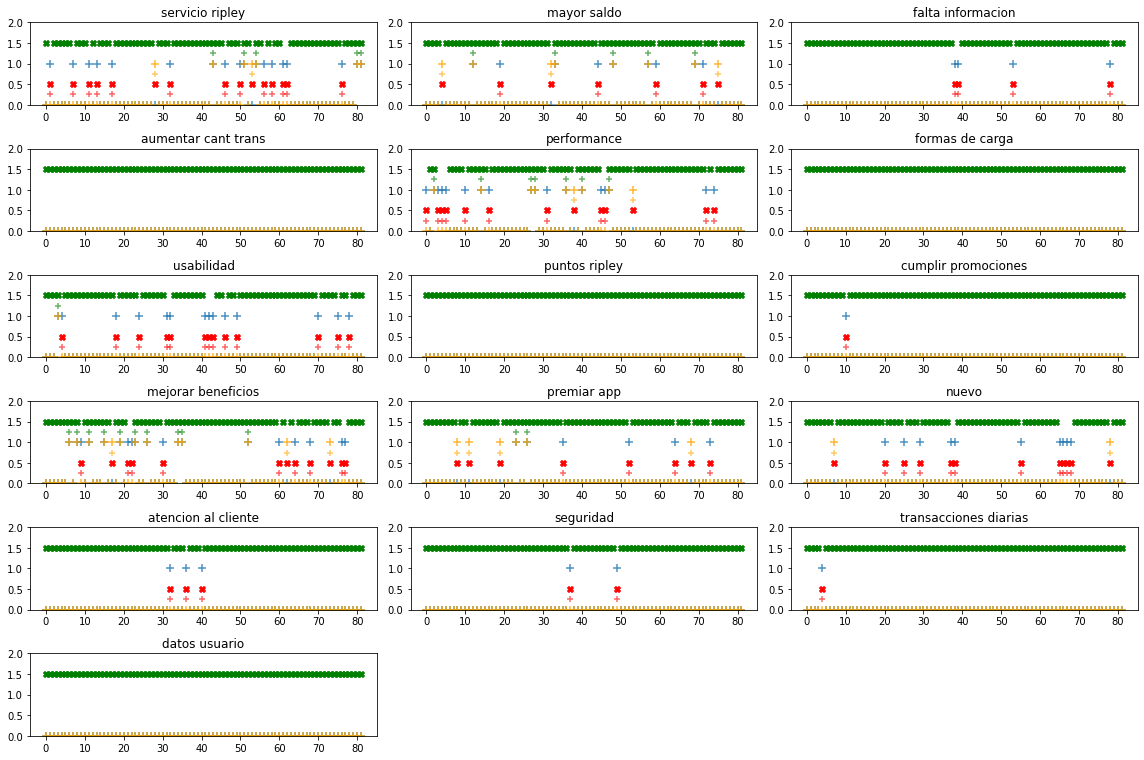

In [18]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(int(np.ceil(len(exp)/3)),3,figsize=(16,2*len(exp)/3))

for i,sExp in enumerate(exp):
    if (data[cat] == None).any():
        print('fuck')
    xPos = range(len(sExp['prediction']))
    axs[int(i/3)][i%3].scatter(xPos,sExp['truth'],marker='+',alpha=.8,s=80)
    axs[int(i/3)][i%3].scatter(xPos,sExp['prediction'], facecolor='orange', marker='+',alpha=.8,s=80)
    axs[int(i/3)][i%3].scatter(xPos,2*(sExp['truth'] == sExp['prediction'])-.5, facecolor='g', marker='X')
    axs[int(i/3)][i%3].scatter(xPos,1.5*(sExp['truth'] * sExp['prediction'])-.25, facecolor='g', marker='+',alpha=.6)
    axs[int(i/3)][i%3].scatter(xPos,0.5*(sExp['truth'] > sExp['prediction'])-.25, facecolor='r', marker='+',alpha=.6)
    axs[int(i/3)][i%3].scatter(xPos,1.0*(sExp['truth'] < sExp['prediction'])-.25, facecolor='orange', marker='+',alpha=.6)
    dPos = np.array(sExp['truth'] != sExp['prediction'],dtype='int')
    axs[int(i/3)][i%3].scatter(xPos,dPos-0.5, facecolor='r', marker='X')
    
    axs[int(i/3)][i%3].set_title(sExp['exp'])
    axs[int(i/3)][i%3].set_ylim((0,2))
    
fig.delaxes(axs[-1][-1])
fig.delaxes(axs[-1][1])
plt.tight_layout()